This notebook demonstrates the application of a random forest regression model to the well-known "housing" dataset. You can download the dataset from http://lib.stat.cmu.edu/datasets/.

**Comments:** "*The file cadata.txt contains all the the variables. Specifically, it contains median house value, median income, housing median age, total rooms, total bedrooms, population, households, latitude, and longitude in that order. The dependent variable is ln(median house value).*"

In [1]:
import numpy

# load data from text file (note that the initial comments have been deleted from the original file)
data = numpy.loadtxt("cadata.txt")

# the first column corresponds to the target variables; the remaining ones are the features
y, X = data[:,0], data[:,1:]
print(X.shape)

(20640, 8)


Let us split the data into a "training set" and a "test set". The test set is NOT used during the model generation phase (started by calling the 'fit'-function). 

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

We first instantiate the "model" object. Afterwards, we call the "fit" method to fit our model (i.e., to compute the weights).

In [12]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

# max_features is "f"
model = ExtraTreesRegressor(n_estimators=300)
model.fit(X_train, y_train)

ExtraTreesRegressor(n_estimators=300)

Given the fitted model, we can now obtain predictions for new data points. For simplification, we just use our data points again here.

In [13]:
preds = model.predict(X_test)

Finally, we have a look at the quality of our model by computing the RMSE and by generating a plot "predictions" vs. "true labels".

RMSE: 53304.04075184151


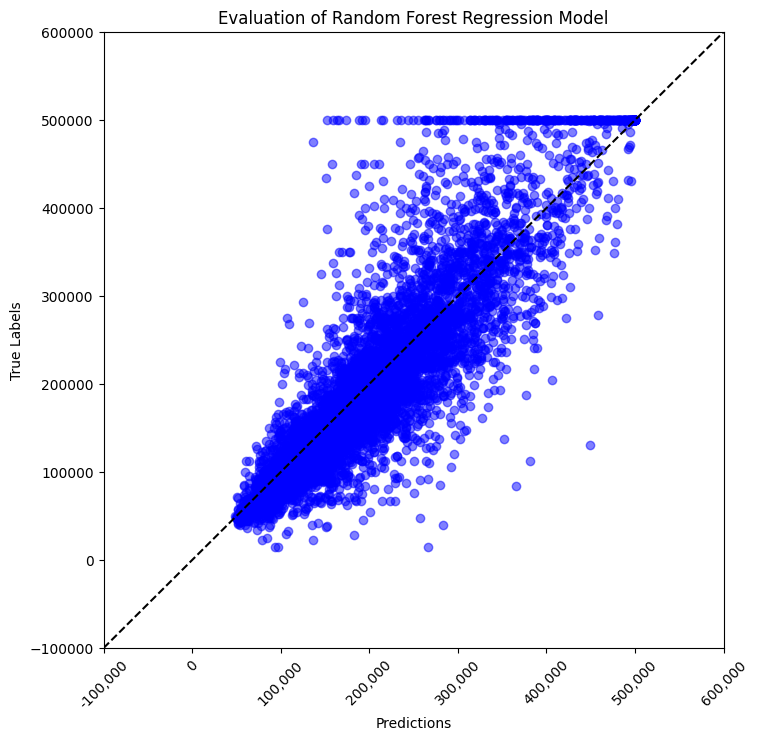

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

from sklearn.metrics import mean_squared_error

# compute RMSE
print("RMSE: {}".format(numpy.sqrt(mean_squared_error(y_test, preds))))

# visualize predictions vs. true labels
fig = plt.figure(figsize=(8,8))
plt.scatter(preds, y_test, color="blue", alpha=0.5)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.plot([-100000,600000], [-100000, 600000], 'k--')
plt.xlabel("Predictions")
plt.ylabel("True Labels")
plt.xlim([-100000,600000])
plt.ylim([-100000,600000])
plt.title("Evaluation of Random Forest Regression Model")
plt.show()

Let us compare the random forest regressor with a standard linear regression model ...

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
preds = model.predict(X_test)

RMSE: 69590.71458154258


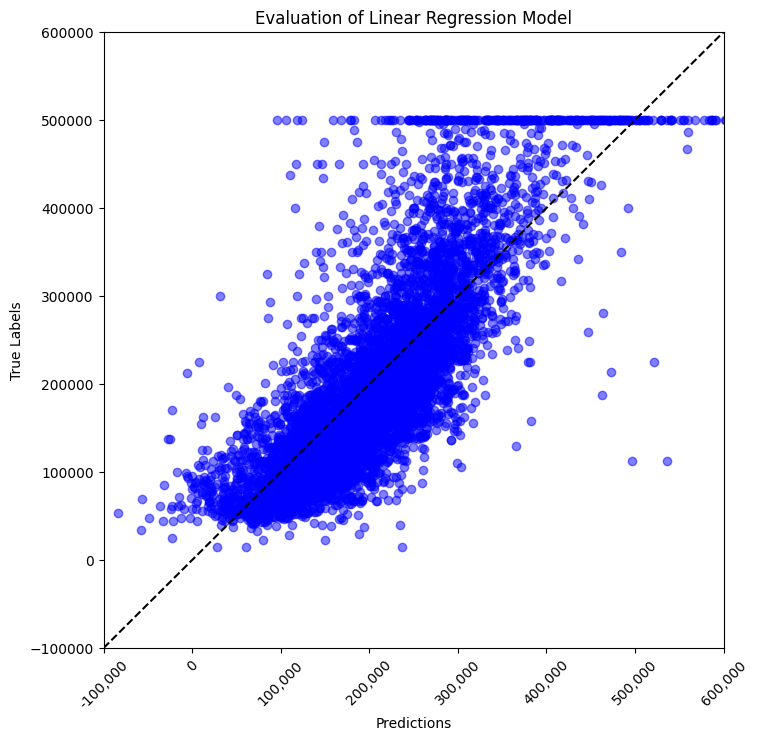

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

from sklearn.metrics import mean_squared_error

# compute RMSE
print("RMSE: {}".format(numpy.sqrt(mean_squared_error(y_test, preds))))

# visualize predictions vs. true labels
fig = plt.figure(figsize=(8,8))
plt.scatter(preds, y_test, color="blue", alpha=0.5)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.plot([-100000,600000], [-100000, 600000], 'k--')
plt.xlabel("Predictions")
plt.ylabel("True Labels")
plt.xlim([-100000,600000])
plt.ylim([-100000,600000])
plt.title("Evaluation of Linear Regression Model")
plt.show()